<center> <h1>Microstructure des prix financiers </h1> </center>




La suite croissante $(T_n)_n$ represente les instants de variations (sauts d'un ou plusieurs ticks) du prix. Les v.a. $J_n$ sont a valeurs dans l'ensemble fini $$ E = \{+1, -1,...,+m,-m\} \subset \mathbb{Z} \setminus \{0\} .$$ et representent les increments (positifs ou negatifs) du prix. Le prix de l'actif est donne par le processus $$P_t = P_0 + \sum_{k=1}^{N_t} J_n$$
ou $N_t$ est le nombre d'evenements avant t, $$N_t = \sum_{n\geq1}^{}1_{T_n\leq t}$$
La valeur courante Pt represente la derniere cotation du prix mid, soit la
moyenne entre le meilleur ask et le meilleur bid.

<h3>Une modelisation simplifiee. </h3> Dans le cadre d'une premiere modelisation simplifiee, on suppose que la suite des increments $(J_n)_n$ est i.i.d. (absence de dependance entre les increments du prix). On suppose de plus que les instants de sauts $(T_n)_n$ sont independants des $(J_n)_n$, et que la suite des intervalles entre sauts $S_n = T_{n+1} - T_n$ est i.i.d. de loi exponentielle de parametre $\lambda$.

<h3>Q1. </h3> On souhaite estimer la probabilite que dans le modele ainsi defini les
trajectoires du prix prennent des valeurs negatives, $$\mathbb{P}[\inf_{t\leq T}P_t < 0]$$
pour $P_0 = 35$ et $T = 4h$. On prendra une valeur de $\lambda$ telle que l'attente moyenne entre un saut et le suivant soit autour de $300s$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math
import random
import time
import copy

### Cas m=3

In [ ]:
## m = 3

num = 10**5 ##numéro de lancement

valeurs = np.array([1, -1, 2, -2, 3, -3])
probas = np.array([0.25, 0.25, 1/6, 1/6, 1/12, 1/12])
distr = []

def traj2():
    Nt=[0]
    P = P0
    distr.append(P)
    indic = 0

    S = np.random.exponential(scale=1/lam)
    t = S
    instants=[t]

    N = 1
    Nt.append(N)

    while (t<T):
        J = np.random.choice(valeurs, p=probas)
        P = P+J
        if (P<0):
            indic = 1
        distr.append(P)
        S = np.random.exponential(scale=1/lam)
        t = t + S
        instants.append(t)
        N = N+1

    return indic

prob = 0
sumbis = 0
for i in range(1, num):
    res = traj2()
    prob = prob + res
    sumbis = sumbis + res**2

prob = prob/num
sumbis = sumbis/num
var = sumbis - (prob)**2/num

## Estimation des quantiles

In [ ]:
print("La probabilite que les trajectoires prennent des valeurs negatives:", prob)

alpha = 0.05
q_alpha = sps.norm.ppf(1 - alpha / 2)

ray = q_alpha * np.sqrt(var/num)
left = max(0,prob - ray) ## une probabilité est comprise entre 0 et 1
right = min(1,prob + ray)

print("Intervalle de confiance asymptotique de probabilité de couverture  à 95%: [",left, ',', right, "]")

D = np.array(distr)
D.sort()

#IC pour quantile

u1 = 10**(-4) ## quantile à gauche
u2 = 1-10**(-4) ## quantile à droite
u3 = 10**(-5)
u4 = 1-10**(-5)
u5 = 10**(-6)
u6 = 1-10**(-6)

num = len(D)

anmoins = 1-u1 - 1.96*np.sqrt(u1*(1-u1)/num)
anplus = min(1,1-u1 + 1.96*np.sqrt(u1*(1-u1)/num))
Q1g = np.quantile(D, u1, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
ICd = D[[index_moins, index_plus]]

anmoins = 1-u2 - 1.96*np.sqrt(u2*(1-u2)/num)
anplus = min(1,1-u2 + 1.96*np.sqrt(u2*(1-u2)/num))
Q1d = np.quantile(D, u2, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
ICg = D[[index_moins, index_plus]]

anmoins = 1-u3 - 1.96*np.sqrt(u3*(1-u3)/num)
anplus = min(1,1-u3 + 1.96*np.sqrt(u3*(1-u3)/num))
Q2g = np.quantile(D, u3, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC2d = D[[index_moins, index_plus]]

anmoins = 1-u4 - 1.96*np.sqrt(u4*(1-u4)/num)
anplus = min(1,1-u4 + 1.96*np.sqrt(u4*(1-u4)/num))
Q2d = np.quantile(D, u4, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC2g = D[[index_moins, index_plus]]

anmoins = 1-u5 - 1.96*np.sqrt(u5*(1-u5)/num)
anplus = min(1,1-u5 + 1.96*np.sqrt(u5*(1-u5)/num))
Q3g = np.quantile(D, u5, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC3d = D[[index_moins, index_plus]]

anmoins = 1-u6 - 1.96*np.sqrt(u6*(1-u6)/num)
anplus = min(1,1-u6 + 1.96*np.sqrt(u6*(1-u6)/num))
Q3d = np.quantile(D, u6, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC3g = D[[index_moins, index_plus]]


print("Quantile a 10^(-4) a gauche: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q1g, ICg[0], ICg[1]))
print("Quantile a 10^(-4) a droite: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q1d, ICd[0], ICd[1]))
print("Quantile a 10^(-5) a gauche: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q2g, IC2g[0], IC2g[1]))
print("Quantile a 10^(-5) a droite: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q2d, IC2d[0], IC2d[1]))
print("Quantile a 10^(-6) a gauche: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q3g, IC3g[0], IC3g[1]))
print("Quantile a 10^(-6) a droite: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q3d, IC3d[0], IC3d[1]))

La probabilite que les trajectoires prennent des valeurs negatives: 0.00402
Intervalle de confiance asymptotique de probabilité de couverture  à 95%: [ 0.003627028450923031 , 0.0044129715490769696 ]
Quantile a 10^(-4) a gauche: -6.00, IC= [-7.00, -6.00] 

Quantile a 10^(-4) a droite: 77.00, IC= [76.00, 77.00] 

Quantile a 10^(-5) a gauche: -15.00, IC= [-15.00, -14.00] 

Quantile a 10^(-5) a droite: 84.00, IC= [84.00, 85.00] 

Quantile a 10^(-6) a gauche: -19.00, IC= [-21.00, -18.00] 

Quantile a 10^(-6) a droite: 89.00, IC= [88.00, 92.00] 



## Cas m=1

### Approche naïve

In [ ]:
## m = 1
P0 = 35
T = 4*60*60
lam = 1/300
num = 10**5 ##nombre d'itérations Monte Carlo naïf

valeurs = np.array([1, -1])
probas = np.array([0.5, 0.5])
distr = []
date=time.time()

def traj():

    P = P0
    distr.append(P)
    indic = 0

    S = np.random.exponential(scale=1/lam)
    t = S
    N = 1
    while (t<T):
        J = np.random.choice(valeurs, p=probas)
        P = P+J
        if (P<0):
            indic = 1
        distr.append(P)
        S = np.random.exponential(scale=1/lam)
        t = t + S
        N = N+1


    return indic

prob = 0
sumbis = 0
for i in range(1, num):
    res = traj()
    prob = prob + res
    sumbis = sumbis + res**2

prob = prob/num
sumbis = sumbis/num
var = sumbis - (prob)**2/num

print("Probabilité :",prob/num)
print("Durée :",time.time()-date)

Probabilité : 0.0
Durée : 322.81440830230713


### Commentaires

Avec un nombre d'itérations num <= 10**6 on observe très peu d'occurrences. La méthode de Monte Carlo naïve est insuffisante.

Pour le calcul des quantiles, on s'y prend de la même manière qu'avec m=1.

In [ ]:
print("La probabilite que les trajectoires prennent des valeurs negatives:", prob)

prob=prob/num
alpha = 0.05
q_alpha = sps.norm.ppf(1 - alpha / 2)
print("var", var)
ray = q_alpha * np.sqrt(var/num)
left = max(0,prob - ray)
right = min(1,prob + ray)
print("Intervalle de confiance asymptotique de probabilité de couverture  à 95%: [",left, ',', right, "]")

D = np.array(distr)
D.sort()

#IC pour quantile

u1 = 10**(-4)
u2 = 1-10**(-4)
u3 = 10**(-5)
u4 = 1-10**(-5)
u5 = 10**(-6)
u6 = 1-10**(-6)

num = len(D)

anmoins = 1-u1 - 1.96*np.sqrt(u1*(1-u1)/num)
anplus = min(1,1-u1 + 1.96*np.sqrt(u1*(1-u1)/num))
Q1g = np.quantile(D, u1, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
ICd = D[[index_moins, index_plus]]

anmoins = 1-u2 - 1.96*np.sqrt(u2*(1-u2)/num)
anplus = min(1,1-u2 + 1.96*np.sqrt(u2*(1-u2)/num))
Q1d = np.quantile(D, u2, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
ICg = D[[index_moins, index_plus]]

anmoins = 1-u3 - 1.96*np.sqrt(u3*(1-u3)/num)
anplus = min(1,1-u3 + 1.96*np.sqrt(u3*(1-u3)/num))
Q2g = np.quantile(D, u3, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC2d = D[[index_moins, index_plus]]

anmoins = 1-u4 - 1.96*np.sqrt(u4*(1-u4)/num)
anplus = min(1,1-u4 + 1.96*np.sqrt(u4*(1-u4)/num))
Q2d = np.quantile(D, u4, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC2g = D[[index_moins, index_plus]]

anmoins = 1-u5 - 1.96*np.sqrt(u5*(1-u5)/num)
anplus = min(1,1-u5 + 1.96*np.sqrt(u5*(1-u5)/num))
Q3g = np.quantile(D, u5, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC3d = D[[index_moins, index_plus]]

anmoins = 1-u6 - 1.96*np.sqrt(u6*(1-u6)/num)
anplus = min(1,1-u6 + 1.96*np.sqrt(u6*(1-u6)/num))
Q3d = np.quantile(D, u6, axis = None)
index_moins = int(np.ceil(num*anmoins))-1
index_plus = int(np.ceil(num*anplus))-1
IC3g = D[[index_moins, index_plus]]


print("Quantile a 10^(-4) a gauche: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q1g, ICg[0], ICg[1]))
print("Quantile a 10^(-4) a droite: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q1d, ICd[0], ICd[1]))
print("Quantile a 10^(-5) a gauche: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q2g, IC2g[0], IC2g[1]))
print("Quantile a 10^(-5) a droite: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q2d, IC2d[0], IC2d[1]))
print("Quantile a 10^(-6) a gauche: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q3g, IC3g[0], IC3g[1]))
print("Quantile a 10^(-6) a droite: {:1.2f}, IC= [{:1.2f}, {:1.2f}] \n".format(Q3d, IC3d[0], IC3d[1]))

La probabilite que les trajectoires prennent des valeurs negatives: 0.0
var 0.0
Intervalle de confiance asymptotique de probabilité de couverture  à 95%: [ 0 , 0.0 ]
Quantile a 10^(-4) a gauche: 13.00, IC= [13.00, 13.00] 

Quantile a 10^(-4) a droite: 57.00, IC= [57.00, 57.00] 

Quantile a 10^(-5) a gauche: 9.00, IC= [9.00, 10.00] 

Quantile a 10^(-5) a droite: 61.00, IC= [61.00, 62.00] 

Quantile a 10^(-6) a gauche: 5.00, IC= [4.00, 6.00] 

Quantile a 10^(-6) a droite: 65.00, IC= [65.00, 67.00] 



## Amélioration de l'algorithme
Afin de palier aux temps de calculs trop importants, on s'intéresse à une méthode de splitting pour chaine de Markov.
Pour simplifier le problème, on s'intéresse à la différence entre la valeur du prix à l'instant t et l'instant initial. Donc 'sauts' représente Pt - P0 au cours du temps.

In [ ]:
## m = 1
P0 = 35
T = 4*60*60
lam = 1/300
num = 10**3
p=0.1
M=int(1000)

valeurs = np.array([1, -1])
probas = np.array([0.5, 0.5])
distr = np.array([])
date=time.time()

def processuspoisson(mu):
    Nt=[0]
    instants=[0]
    N=0
    sauts=[0]
    t=0
    S = np.random.exponential(scale=1/mu)
    t=t+S
    while (t<T):
        J = np.random.choice(valeurs, p=probas)

        N+=1
        sauts.append(J)
        instants.append(t)
        Nt.append(N)
        S = np.random.exponential(scale=1/mu)
        t=t+S

    return sauts, instants, Nt

def coloriageprocessus(triplet):
    sauts, instants, Nt=triplet
    n=len(sauts)
    _=1
    while _ < n-1: ## sauts[0] vaut toujours 0 la différence P0 - P0
        if np.random.uniform()>p: ## avec probabilité p on garde chaque saut sinon on relance le tirage
                                    ## may be improved later by using matrix methods
            sauts.pop(_)
            instants.pop(_)
            Nt.pop() ## remove the last element, we delete one jump
            n-=1 ## we changed the length of sauts
        else:
            _+=1
    return sauts, instants, Nt

def increment(triplet): ## superposition entre copie de N((1-p)*lambda) et N(p*lambda)
    sauts1,instants1, Nt1=coloriageprocessus(triplet)
    sauts2,instants2, Nt2=processuspoisson((1-p)*lam)
    i1,i2=1,1
    Nt3=[0]
    N=0
    sauts3=[0]
    instants3=[0]

    while i1<len(sauts1) and i2<len(sauts2):
        if instants1[i1]<instants2[i2]:
            instants3.append(instants1[i1])
            sauts3.append(sauts1[i1])
            N+=1
            Nt3.append(N)
            i1+=1
        else:
            instants3.append(instants2[i2])
            sauts3.append(sauts2[i2])
            N+=1
            Nt3.append(N)
            i2+=1
    for i in range(len(sauts1)-i1):
        instants3.append(instants1[i1])
        sauts3.append(sauts1[i1])
        N+=1
        Nt3.append(N)
        i1+=1

    for i in range(len(sauts2)-i2):
        instants3.append(instants2[i2])
        sauts3.append(sauts2[i2])
        N+=1
        Nt3.append(N)
        i2+=1

    return sauts3, instants3, Nt3


def suiteprocessus(akmoinsun):
    taux_accept=0
    temp=processuspoisson(lam)
    while min(np.cumsum(temp[0]))>akmoinsun:
        temp=processuspoisson(lam) ##on initialise
    dist=[temp for _ in range(M)] ##on crée une suite de processus de poisson de taille M

    for l in range(1,M):
        temp=increment(copy.deepcopy(dist[l-1]))
        if min(np.cumsum(temp[0]))<=akmoinsun:
            dist[l]=copy.deepcopy(temp)                         ## N^(l+1) = Ñ(l+1)
            taux_accept+=1/M
        else:
            dist[l]=copy.deepcopy(dist[l-1])     ## N^(l+1) = N^l
    #print("taux :",taux_accept)
    return dist

def cond_prob(b,akmoinsun): ## on conditionne sachant que la trajectoire est passée sous akmoinsun la probabilité
                            ## de passer sous b
    cond=0
    dis=suiteprocessus(akmoinsun)

    for elem in dis:
        if min(np.cumsum(elem[0]))<=b: ## inf (Pt - P0) inférieur ou égal à b ?
            cond+=1
    print(cond/len(dis))
    return cond/len(dis)

#cond_prob(-35,-33)


### Cas m=1 coloriage

In [ ]:
## m = 1
P0 = 35
T = 4*60*60
lam = 1/660
num = 10**3
p=0.9


valeurs = np.array([1, -1])
probas = np.array([0.5, 0.5])
distr = np.array([])


def processuspoisson(mu):
    Nt=[0]
    instants=[0]
    N=0
    sauts=[0]
    t=0
    S = np.random.exponential(scale=1/mu, size=100)
    t=t+S[N]
    J = np.random.choice(valeurs, p=probas,size=100) ## the number of random selection is 48 on average
                                                    ## by randoming before the loop the overall algo is 4 times faster
    while (t<T):

        sauts.append(J[N])
        instants.append(t)
        N+=1
        Nt.append(N)
        t=t+S[N]

    return sauts, instants, Nt

def coloriageprocessus(triplet):
    sauts, instants, Nt=copy.deepcopy(triplet)
    n=len(sauts)
    _=1
    while _ < n-1: ## sauts[0] vaut toujours 0 la différence P0 - P0
        if np.random.uniform()>p: ## avec probabilité p on garde chaque saut sinon on relance le tirage
                                    ## may be improved later by using matrix methods
            sauts.pop(_)
            instants.pop(_)
            Nt.pop() ## remove the last element, we delete one jump
            n-=1 ## we changed the length of sauts
        else:
            _+=1
    return sauts, instants, Nt

def increment(triplet): ## superposition entre copie de N((1-p)*lambda) et N(p*lambda)
    return somme_processus(coloriageprocessus(triplet),processuspoisson((1-p)*lam))

def somme_processus(triplet1,triplet2):
    sauts1,instants1, Nt1=triplet1
    sauts2,instants2, Nt2=triplet2
    i1,i2=1,1
    Nt3=[0]
    N=0
    sauts3=[0]
    instants3=[0]

    while i1<len(sauts1) and i2<len(sauts2):
        if instants1[i1]<instants2[i2]:
            instants3.append(instants1[i1])
            sauts3.append(sauts1[i1])
            N+=1
            Nt3.append(N)
            i1+=1
        else:
            instants3.append(instants2[i2])
            sauts3.append(sauts2[i2])
            N+=1
            Nt3.append(N)
            i2+=1

    for i in range(len(sauts1)-i1):
        instants3.append(instants1[i1])
        sauts3.append(sauts1[i1])
        N+=1
        Nt3.append(N)
        i1+=1

    for i in range(len(sauts2)-i2):
        instants3.append(instants2[i2])
        sauts3.append(sauts2[i2])
        N+=1
        Nt3.append(N)
        i2+=1

    return sauts3, instants3, Nt3



def suiteprocessus(b,akmoinsun,M):
    date=time.time()
    s=0
    indic=0
    taux=1
    temp=processuspoisson(lam)

    while min(np.cumsum(temp[0]))>akmoinsun:
        temp=processuspoisson(lam) ##temp est une trajectoire qui passe sous akmoinsun

    if min(np.cumsum(temp[0]))<=b:
                indic=1
    s+=indic

    for l in range(1,M):
        #print("temp :",temp)
        #print(min(np.cumsum(temp[0])))
        temp_tilde =increment(temp)
        #print("tilde :",temp_tilde)
        #print(min(np.cumsum(temp_tilde[0])))
        if min(np.cumsum(temp_tilde[0]))<=akmoinsun:
            indic = int(min(np.cumsum(temp_tilde[0]))<=b)
            temp=temp_tilde
            taux+=1
        #print("min trajectoire :",min(np.cumsum(temp[0])))
        s+=indic
    print("proba d'être inférieur à",b,"sachant qu'on est inférieur à",akmoinsun,":",s/M)
    print("durée en secondes :",time.time()-date,"s")
    print("")
    print("taux :",taux/M*100,"% pour p =",p)
    return s/M




In [ ]:
#for p in [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]:

    #suiteprocessus(-10,0,10000)

processus poisson : ([0, 1, 1], [0, 1062.9219873484406, 5052.827439742119, 24092.915041212753], [0, 1, 2, 3])
coloriage : ([0, 1], [0, 5052.827439742119, 24092.915041212753], [0, 1, 2])


### Commentaires ?

## Q2
- Retour vers la moyenne: les variations du prix sur des courts intervalles de temps sont fortement anti-corrélées. Cela détermine un effet appelé retour vers la moyenne : le prix a tendance à osciller autour d'une valeur intermédiare.
- Clusters de volatilité : on observe une alternance de périodes avec activité de trading intense (volatilité du prix plus élévée) et de périodes plus calmes (volatilité plus faible).
- Afin de rajouter une plus forte composante de retour vers la moyenne, on peut modéliser le prix mid par une superposition de processus
$$
P_{t}=P_{t}^{(1)}+P_{t}^{(2)} \text {, }
$$
où $P_{t}^{(i)}=P_{0} / 2+\sum_{n=1}^{N_{t}^{(i)}} J_{n}^{(i)}$ pour $i=1,2$, toutes les variables aléatoires indexées par $i=1$ et $i=2$ étant indépendantes. On considérera :
(1) les mêmes hypothèses qu'avant sur les distributions de $\left(N_{t}^{(1)}\right)_{t \geq 0}$ et $\left(J_{n}^{(1)}\right)_{n \geq 1}$, en changeant la durée moyenne $1 / \lambda_{1}$ entre les sauts de $300 \mathrm{~s}$ à $660 \mathrm{~s}$.
(2) une suite de sauts $J_{n+1}^{(2)}=-J_{n}^{(2)}$, à partir de $J_{1}^{(2)}$ avec $\mathbb{P}\left(J_{1}^{(2)}=1\right)=$ $\mathbb{P}\left(J_{1}^{(2)}=-1\right)=1 / 2$. Ce choix modélise la composante du prix soumise à oscillation. On prendra pour $N_{t}^{(2)}$ un processus de Poisson simple, de durée moyenne entre sauts $1 / \lambda_{2}=110 \mathrm{~s}$.


In [ ]:
## m = 1
P0 = 35
T = 4*60*60
lam1 = 1/660
lam2 = 1/110
num = 10**4 ##numéro de lancement
p=0.9
valeurs = np.array([1, -1])
probas = np.array([0.5, 0.5])
distr = []
date=time.time()

def processuspoisson(mu):
    Nt=[0]
    instants=[0]
    N=0
    sauts=[0]
    t=0
    S = np.random.exponential(scale=1/mu, size=1000)
    t=t+S[N]
    J = np.random.choice(valeurs, p=probas,size=1000) ## the number of random selection is 48 on average
                                                    ## by randoming before the loop the overall algo is 4 times faster
    while (t<T):

        sauts.append(J[N])
        instants.append(t)
        N+=1
        Nt.append(N)
        t=t+S[N]

    return sauts, instants, Nt

def processuspoisson_bis(mu):
    Nt=[0]
    instants=[0]
    N=0
    sauts=[0]
    t=0

    S = np.random.exponential(scale=1/mu, size=10000)
    t=t+S[N]
    oscillation = np.random.choice(valeurs, p=probas)

    while (t<T):

        sauts.append(oscillation)
        instants.append(t)
        N+=1
        Nt.append(N)
        t=t+S[N]
        oscillation*=-1

    return sauts, instants, Nt

def coloriageprocessus(triplet):
    sauts, instants, Nt=copy.deepcopy(triplet)
    n=len(sauts)
    _=1
    while _ < n-1: ## sauts[0] vaut toujours 0 la différence P0 - P0
        if np.random.uniform()>p: ## avec probabilité p on garde chaque saut sinon on relance le tirage
                                    ## may be improved later by using matrix methods
            sauts.pop(_)
            instants.pop(_)
            Nt.pop() ## remove the last element, we delete one jump
            n-=1 ## we changed the length of sauts
        else:
            _+=1
    return sauts, instants, Nt


def somme_processus(triplet1,triplet2):
    sauts1,instants1, Nt1=triplet1
    sauts2,instants2, Nt2=triplet2
    i1,i2=1,1
    Nt3=[0]
    N=0
    sauts3=[0]
    instants3=[0]

    while i1<len(sauts1) and i2<len(sauts2):
        if instants1[i1]<instants2[i2]:
            instants3.append(instants1[i1])
            sauts3.append(sauts1[i1])
            N+=1
            Nt3.append(N)
            i1+=1
        else:
            instants3.append(instants2[i2])
            sauts3.append(sauts2[i2])
            N+=1
            Nt3.append(N)
            i2+=1

    for i in range(len(sauts1)-i1):
        instants3.append(instants1[i1])
        sauts3.append(sauts1[i1])
        N+=1
        Nt3.append(N)
        i1+=1

    for i in range(len(sauts2)-i2):
        instants3.append(instants2[i2])
        sauts3.append(sauts2[i2])
        N+=1
        Nt3.append(N)
        i2+=1

    return sauts3, instants3, Nt3

def suiteprocessus_bis(b,akmoinsun,M):
    s=0
    indic=0
    temp1=processuspoisson(lam1)
    temp2=processuspoisson_bis(lam2)
    temp=somme_processus(temp1,temp2)

    while min(np.cumsum(temp[0]))>akmoinsun:
        temp1=processuspoisson(lam1)
        temp2=processuspoisson_bis(lam2)
        temp=somme_processus(temp1,temp2)
    if min(np.cumsum(temp[0]))<=b:
                indic=1
    s+=indic

    for l in range(1,M):
        temp1_tilde=somme_processus(coloriageprocessus(temp1),processuspoisson((1-p)*lam1))
        temp2_tilde=somme_processus(coloriageprocessus(temp2),processuspoisson((1-p)*lam2))
        temp_somme =somme_processus(temp1_tilde,temp2_tilde)
        if min(np.cumsum(temp_somme[0]))<=akmoinsun:
            indic = int(min(np.cumsum(temp_somme[0]))<=b)
            temp1=temp1_tilde
            temp2=temp2_tilde
        #print("min trajectoire :",min(np.cumsum(temp[0])))
        s+=indic
    print("proba d'être inférieur à",b,"sachant qu'on est inférieur à",akmoinsun,":",s/M)
    print("durée en secondes :",time.time()-date,"s")
    print("")
    return s/M

def compteur(b):
    s=1
    temp=processuspoisson(lam)
    while min(np.cumsum(temp[0]))>b:
        temp=processuspoisson(lam)
        s+=1
    print("temps écoulé pour compteur:",time.time()-date,"s")
    return s

def compteur_bis(b):
    s=1
    temp1=processuspoisson(lam1)
    temp2=processuspoisson_bis(lam2)
    temp=somme_processus(temp1,temp2)
    while min(np.cumsum(temp[0]))>b:
        temp1=processuspoisson(lam1)
        temp2=processuspoisson_bis(lam2)
        temp=somme_processus(temp1,temp2)
        s+=1
    print("temps écoulé pour compteur_bis:",time.time()-date,"s")
    return s





### Niveaux splitting

In [ ]:
def niveaux_splitting(distribution,k):
    x=np.linspace(1/k,1,k)
    print("x :",x)
    return [np.quantile(distribution,x)]

### Esscher transform

In [ ]:
## m = 1
P0 = 35
T = 4*60*60
lam1 = 1/660
lam2 = 1/110
theta=-1

def ch(theta):
    return 0.5*(np.exp(-theta)+np.exp(theta))

p=0.9
valeurs = np.array([1, -1])
probas = np.array([np.exp(theta)/(2*ch(theta)), np.exp(-theta)/(2*ch(theta))])
print("probas :",probas)

date=time.time()

def ech_importance(seuil,M):
    lam1f=ch(theta)*lam1
    s=0
    for i in range(M):
        temp=somme_processus(processuspoisson(lam1f),processuspoisson_bis(lam2))
        #temp=processuspoisson(lam1f)
        cum =np.cumsum(temp[0])

        if min(cum)<seuil:
            s+=np.exp(-theta*cum[-1])

    s*=np.exp((lam1f-lam1)*T)
    s/=M
    return s

def ech_importance_bis(seuil,M):
    lam1f=ch(theta)*lam1
    print("lam1",lam1)
    print("lam1f",lam1f)
    s=0
    for i in range(M):
        temp=processuspoisson(lam1f)
        cum =np.cumsum(temp[0])

        if min(cum)<seuil:
            #print("")
            print("cum",cum)
            #print("cum[-1]",cum[-1])
            print("increment :",np.exp(-theta*cum[-1]))
            s+=np.exp(-theta*cum[-1])
    print("np.exp((lam1f-lam1)*T) :",np.exp((lam1f-lam1)*T))

    s*=np.exp((lam1f-lam1)*T)
    s/=M
    print("proba echantillonage importance :",s)
    print("durée :",time.time()-date)
    return s



ech_importance(-36,1000000)



probas : [0.11920292 0.88079708]


4.572047976815248e-13

### Histogramme

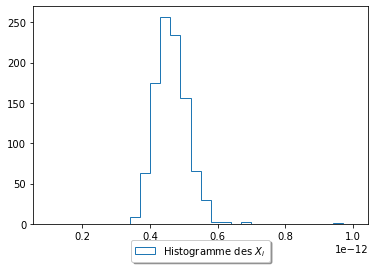

In [ ]:
## longueur de la chaine X
n = int(1000)


X = [0 for _ in range(n)]
for i in range(n):
    X[i] = ech_importance(-36,10000)


# histogramme
plt.hist(X, bins=30, density=False, histtype='step', label=r"Histogramme des $X_i$", range=[1e-13,1e-12])

#plt.axvline(x=X[0], color="g",linewidth=1.5, label="X_0")

# on choisit la position de la legende
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fancybox=True, shadow=True)
plt.show()

In [ ]:
## m = 1
P0 = 35
T = 4*60*60
lam1 = 1/660
lam2 = 1/110
num = 10**4 ##numéro de lancement
p=0.9
valeurs = np.array([1, -1])
probas = np.array([0.5, 0.5])
distr = []
date=time.time()

def processuspoisson(mu):
    Nt=[0]
    instants=[0]
    N=0
    sauts=[0]
    t=0
    S = np.random.exponential(scale=1/mu, size=300)
    t=t+S[N]
    J = np.random.choice(valeurs, p=probas,size=300) ## the number of random selection is 48 on average
                                                    ## by randoming before the loop the overall algo is 4 times faster
    while (t<T):

        sauts.append(J[N])
        instants.append(t)
        N+=1
        Nt.append(N)
        t=t+S[N]

    return sauts, instants, Nt

def processuspoisson_bis(mu):
    Nt=[0]
    instants=[0]
    N=0
    sauts=[0]
    t=0

    S = np.random.exponential(scale=1/mu, size=10000)
    t=t+S[N]
    oscillation = np.random.choice(valeurs, p=probas)

    while (t<T):

        sauts.append(oscillation)
        instants.append(t)
        N+=1
        Nt.append(N)
        t=t+S[N]
        oscillation*=-1

    return sauts, instants, Nt

def coloriageprocessus(triplet):
    sauts, instants, Nt=copy.deepcopy(triplet)
    n=len(sauts)
    _=1
    while _ < n-1: ## sauts[0] vaut toujours 0 la différence P0 - P0
        if np.random.uniform()>p: ## avec probabilité p on garde chaque saut sinon on relance le tirage
                                    ## may be improved later by using matrix methods
            sauts.pop(_)
            instants.pop(_)
            Nt.pop() ## remove the last element, we delete one jump
            n-=1 ## we changed the length of sauts
        else:
            _+=1
    return sauts, instants, Nt


def somme_processus(triplet1,triplet2):
    sauts1,instants1, Nt1=triplet1
    sauts2,instants2, Nt2=triplet2
    i1,i2=1,1
    Nt3=[0]
    N=0
    sauts3=[0]
    instants3=[0]

    while i1<len(sauts1) and i2<len(sauts2):
        if instants1[i1]<instants2[i2]:
            instants3.append(instants1[i1])
            sauts3.append(sauts1[i1])
            N+=1
            Nt3.append(N)
            i1+=1
        else:
            instants3.append(instants2[i2])
            sauts3.append(sauts2[i2])
            N+=1
            Nt3.append(N)
            i2+=1

    for i in range(len(sauts1)-i1):
        instants3.append(instants1[i1])
        sauts3.append(sauts1[i1])
        N+=1
        Nt3.append(N)
        i1+=1

    for i in range(len(sauts2)-i2):
        instants3.append(instants2[i2])
        sauts3.append(sauts2[i2])
        N+=1
        Nt3.append(N)
        i2+=1

    return sauts3, instants3, Nt3

def suiteprocessus_bis(b,akmoinsun,M):
    s=0
    indic=0
    temp1=processuspoisson(lam1)
    temp2=processuspoisson_bis(lam2)

    while min(np.cumsum(temp1[0]))>akmoinsun:
        temp1=processuspoisson(lam1)

    if min(np.cumsum(temp[0]))>akmoinsun:
        temp2[0]*=-1
    temp=somme_processus(temp1,temp2)

    print("on a trouvé l'init :",temp)
    print("min trajectoire :",min(np.cumsum(temp[0])))
    if min(np.cumsum(temp[0]))<=b:
                indic=1
    s+=indic

    for l in range(1,M):
        #print("temp :",temp)
        #print(min(np.cumsum(temp[0])))
        temp1_tilde=somme_processus(coloriageprocessus(temp1),processuspoisson((1-p)*lam1))
        temp_somme =somme_processus(temp1_tilde,temp2)
        #print("tilde :",temp_tilde)
        #print(min(np.cumsum(temp_tilde[0])))
        if min(np.cumsum(temp_somme[0]))<=akmoinsun:
            indic = int(min(np.cumsum(temp_somme[0]))<=b)
            temp1=temp1_tilde
        #print("min trajectoire :",min(np.cumsum(temp[0])))
        s+=indic
    print("proba d'être inférieur à",b,"sachant qu'on est inférieur à",akmoinsun,":",s/M)
    print("durée en secondes :",time.time()-date,"s")
    print("")
    return s/M

def compteur(b):
    s=1
    temp=processuspoisson(lam)
    while min(np.cumsum(temp[0]))>b:
        temp=processuspoisson(lam)
        s+=1
    print("temps écoulé pour compteur:",time.time()-date,"s")
    return s

def compteur_bis(b):
    s=1
    temp1=processuspoisson(lam1)
    temp2=processuspoisson_bis(lam2)
    temp=somme_processus(temp1,temp2)
    while min(np.cumsum(temp[0]))>b:
        temp1=processuspoisson(lam1)
        temp2=processuspoisson_bis(lam2)
        temp=somme_processus(temp1,temp2)
        #print("min(np.cumsum(temp[0]))",min(np.cumsum(temp[0])))
        s+=1
    print("temps écoulé pour compteur_bis:",time.time()-date,"s")
    return s



### Commentaires
On se retrouve confronté au même problème que lors de la question 1.
On envisage d'effectuer une nouvelle méthode de Splitting après avoir résolu la question 1 dans son intégralité.

In [ ]:
## m = 3
P0 = 35
T = 4*60*60
lam1 = 1/660
lam2 = 1/110
num = 10**6 ##numéro de lancement

valeurs = np.array([1, -1])
probas = np.array([0.5, 0.5])

valeurs1 = np.array([1, -1, 2, -2, 3, -3])
probas1 = np.array([0.25, 0.25, 1/6, 1/6, 1/12, 1/12])

distr = []

def traj4():

    P1 = P0/2
    P2 = P0/2
    P = P1+P2
    distr.append(P)
    indic = 0

    S1 = np.random.exponential(scale=1/lam1)
    S2 = np.random.exponential(scale=1/lam2)
    t1 = S1
    t2 = S2
    J2 = np.random.choice(valeurs, p=probas)
    N1 = 1
    N2 = 1

    while ((t1<T)or(t2<T)):

        if (t1<T):
            J1 = np.random.choice(valeurs1, p=probas1)
            P1 = P1+J1
            S1 = np.random.exponential(scale=1/lam1)
            t1 = t1 + S1
            N1 = N1+1
        if (t2<T):
            P2 = P2+J2
            J2 = -J2
            S2 = np.random.exponential(scale=1/lam2)
            t2 = t2 + S2
            N2 = N2+1

        P = P1+P2

        if (P<0):
            indic = 1
        distr.append(P)


    return indic

prob = 0
sumbis=0
for i in range(1, num):
    res = traj4()
    prob = prob + res
    sumbis+=res**2
var=sumbis-prob**2

print(prob/num)

5e-05


### Commentaires
Pour m=3 on trouve 3 occurrences de l'évènement avec num=10**5. Comme en Q1, la probabilité d'avoir une trajectoire
qui passe sous 0 paraît plus élevée que pour le cas m=1.

Toutefois, le faible nombre d'occurrence nous incite à implémenter une méthode différente de Monte Carlo naïf. C'est pourquoi
nous avons arrêté temporairement l'étude de cette question.

In [ ]:
print("Probabilité que les trajectoires prennent des valeurs negatives:", prob/num)
D = distr

print("Quantile a 10^(-4) a gauche: ", np.quantile(D, 10**(-4), axis = None))
print("Quantile a 10^(-4) a droite: ", np.quantile(D, 1-10**(-4), axis = None))
print("Quantile a 10^(-5) a gauche: ", np.quantile(D, 10**(-5), axis = None))
print("Quantile a 10^(-5) a droite: ", np.quantile(D, 1-10**(-5), axis = None))
print("Quantile a 10^(-6) a gauche: ", np.quantile(D, 10**(-6), axis = None))
print("Quantile a 10^(-6) a droite: ", np.quantile(D, 1-10**(-6), axis = None))

Probabilité que les trajectoires prennent des valeurs negatives: 3e-05
Quantile a 10^(-4) a gauche:  2.0
Quantile a 10^(-4) a droite:  66.0
Quantile a 10^(-5) a gauche:  -2.0
Quantile a 10^(-5) a droite:  69.0
Quantile a 10^(-6) a gauche:  -5.0
Quantile a 10^(-6) a droite:  70.0


<h3>Q3. </h3> Des estimations à partir des données sur l'Euribor future  ont montré qu'il est réaliste de considérer le cas symétrique $\alpha_{+}=\alpha_{-}=\alpha$. On fixera pour $\alpha$ la valeur estimée dans l'article.
Simuler des trajectoires du prix $P_{t}$, observer empiriquement sur les simulations que l'on a $\mathbb{P}\left(\hat{J}_{n} \hat{J}_{n+1}=1\right) \approx(1+\alpha) / 2$. Estimer dans ce cas également la probabilité que le prix $P_{t}$ prenne des valeurs négatives au cours de $N=100$ variations, ainsi que les quantiles à $10^{-4}$ et $10^{-5}$ de la valeur finale du prix.

In [ ]:
P0 = 35
T = 4*60*60
lam = 1/300
num = 10**3 ##numéro de lancement
K = 15
p = 0.1
alph = -0.875
a_plus = alph
a_min = alph
m = 3
n = 1000
p1 = (1+alph)/2
p2 = (1-alph)/2

val = np.array([1, -1])
probb = np.array([0.5, 0.5])
probb1 = np.array([p1, p2])
probb2 = np.array([p2, p1])

valeurs = np.arange(1,m+1)
probas = np.array([0.4, 0.3, 0.3])


def traj5():

    P = P0
    distr.append(P)
    indic = 0
    J_t = np.random.choice(val, p=probb)

    S = np.random.exponential(scale=1/lam)
    t = S
    N = 1
    count = 0
    prob_j = 0

    while (t<T):
        if (J_t == 1):
            J_t = np.random.choice(val, p=probb1)
            if (J_t == 1):
                prob_j = prob_j+1
        else:
            J_t = np.random.choice(val, p=probb2)
            if (J_t == -1):
                prob_j = prob_j+1
        xi = np.random.choice(valeurs, p=probas)
        J = J_t*xi
        count = count+1
        P = P+J
        if (P<0):
            indic = 1
        distr.append(P)
        S = np.random.exponential(scale=1/lam)
        t = t + S
        N = N+1

    return indic, prob_j/count

prob = 0
probj = 0
sumbis=0
for i in range(1, num):
    res=traj5()
    prob = prob + res[0]
    probj = probj + res[1]
    sumbis = sumbis + res[1]**2

sumbis/=num
var=sumbis-probj**2/(num**2)


print("prob :",prob/num)
print("probj :", probj/num)



prob : 0.0
probj : 0.0606195741197333


### Radon-Nikodym method

In [ ]:

T = 4*60*60
lam = 1/300

alph = -0.875
a_plus = alph
a_min = alph
m = 3

p1 = (1+alph)/2
p2 = (1-alph)/2

val = np.array([1, -1])
probb = np.array([0.5, 0.5])
probb1 = np.array([p1, p2])
probb2 = np.array([p2, p1])

valeurs = np.arange(1,m+1)
probas = np.array([0.4, 0.3, 0.3])


def q3(a,b,c,d):

    probb1 = np.array([a, b])
    probb2 = np.array([c, d])

    countplus=0
    countmoins=0
    J_t = np.random.choice(val, p=probb)
    N = 1
    P0=J_t
    print(" init",J_t)
    counta=0;countb=0;countc=0;countd=0
    while (N<100):
        if (J_t == 1):
            J_t = np.random.choice(val, p=probb1)
            counta+=J_t==1
            countb+=J_t==-1
        else:
            J_t = np.random.choice(val, p=probb2)
            countc+=J_t==1
            countd+=J_t==-1

        P0 = P0+J_t
        N = N+1


    print("a :",counta)
    print("b :",countb)
    print("c :",countc)
    print("d :",countd)
    e=(1+alph)/(2*a)**counta
    f=(1-alph)/(2*b)**countb
    g=((1-alph)/(2*b))**countb
    h=((1+alph)/(2*d))**countd
    print(((1+alph)/(2*a))**counta)
    print(((1-alph)/(2*b))**countb)
    print(((1-alph)/(2*c))**countc)
    print(((1+alph)/(2*d))**countd)
    print("dérivée de radon nidokym :",e*f*g*h)
    print("P0 final :",P0)
    return

print(q3(0.35,0.65,0.35,0.65))

 init -1
a : 10
b : 21
c : 22
d : 46
3.29700594268873e-08
2188.851583235116
2593409545.973605
1.6461385754757707e-47
dérivée de radon nidokym : 1.2100496590698511e-45
P0 final : -36
0


### Commentaires
On vérifie qu'on a bien convergence de probj






In [ ]:

alpha = 0.05
q_alpha = sps.norm.ppf(1 - alpha / 2)

ray = q_alpha * np.sqrt(var/num)
left = max(0,probj/num - ray)
right = min(1,probj/num + ray)

print("la probabilite que les trajectoires prennent des valeurs negatives:", prob/num)
print("Valeur donnée par l'estimateur de la probabilite que J^_n*J^_n+1 = 1:", probj/num)
print("Valeur exacte de(1+alpha)/2", p1)
print("Intervalle de confiance asymptotique de probabilité de couverture  à 95%: [",left, ',', right, "]")
print("")
D = distr

print("Quantile a 10^(-4) a gauche: ", np.quantile(D, 10**(-4), axis = None))
print("Quantile a 10^(-4) a droite: ", np.quantile(D, 1-10**(-4), axis = None))
print("Quantile a 10^(-5) a gauche: ", np.quantile(D, 10**(-5), axis = None))
print("Quantile a 10^(-5) a droite: ", np.quantile(D, 1-10**(-5), axis = None))
print("Quantile a 10^(-6) a gauche: ", np.quantile(D, 10**(-6), axis = None))
print("Quantile a 10^(-6) a droite: ", np.quantile(D, 1-10**(-6), axis = None))

la probabilite que les trajectoires prennent des valeurs negatives: 0.0
Valeur donnée par l'estimateur de la probabilite que J^_n*J^_n+1 = 1: 0.0606195741197333
Valeur exacte de(1+alpha)/2 0.0625
Intervalle de confiance asymptotique de probabilité de couverture  à 95%: [ 0.05845759218978856 , 0.06278155604967804 ]

Quantile a 10^(-4) a gauche:  2.0
Quantile a 10^(-4) a droite:  66.0
Quantile a 10^(-5) a gauche:  -2.0
Quantile a 10^(-5) a droite:  69.0
Quantile a 10^(-6) a gauche:  -5.0
Quantile a 10^(-6) a droite:  70.0


### Commentaires

0.0606195741197333 appartient bien à l'intervalle de confiance

Il reste à calculer précisement la probabilité d'obtenir des valeurs négatives

<h3>Limite macroscopique. </h3> On souhaite etudier le comportement des prix engendre par le modele considere dans la question precedente sur des echellesde temps plus longues.
En supposant une duree de 8h pour chaque jour et 250 jours de trading par
an, horizon $T = 1$ an, estimer la probabilite que le prix $P_t$ prenne des valeurs
negatives, ainsi que les quantiles a $10^{-6}$ de la valeur finale du prix, a partir
de la valeur $P_0 = 1000$ (typique pour un indice boursier).

In [ ]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"

        self.x0 = float(x0)


    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution

        Arguments:
            n_step: Number of steps

        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

        w = np.ones(n_step)*self.x0

        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))

        return w


In [ ]:
T = 1*250*8*60*60
n = 10**8
Pr = np.random.normal(0, T, n)

lam = 1/300
alpha = -0.875
sigma_2 = lam*((1+alpha)/(1-alpha))
sig = (sigma_2)**(1/2)

data = 1000+sig*Pr

alpha = 1-10**(-6)



In [ ]:
X = data
X.sort()

def quant(X, alpha):

    #quantiles empiriques
    anmoins = 1-alpha - 1.96*np.sqrt(alpha*(1-alpha)/n)
    anplus = min(1,1-alpha + 1.96*np.sqrt(alpha*(1-alpha)/n))


    Q_n_u = X[int(np.ceil(n*(1-alpha)))-1]

    index_moins = int(np.ceil(n*anmoins))-1
    index_plus = int(np.ceil(n*anplus))-1


    IC = X[[index_moins, index_plus]]

    if (Q_n_u<0):
        print("Valeur estimee du quantile a gauche: {:1.6f}, IC= [{:1.6f}, {:1.6f}] \n".format(Q_n_u, IC[0], IC[1]))
    else:
        print("Valeur estimee du quantile a droite: {:1.6f}, IC= [{:1.6f}, {:1.6f}] \n".format(Q_n_u, IC[0], IC[1]))

quant(X, alpha)
quant(X, 1-alpha)


Valeur estimee du quantile a gauche: -505442.002267, IC= [-509935.078739, -502376.266747] 

Valeur estimee du quantile a droite: 511313.799895, IC= [507857.134681, 518247.224214] 



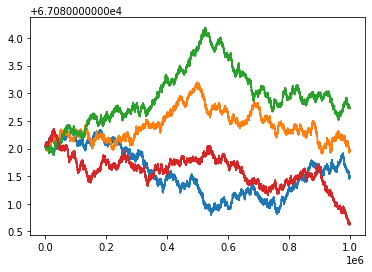

In [ ]:
b = Brownian(1000/sig)
for i in range(4):
    plt.plot(b.gen_normal(10**6))
plt.show()